In [1]:
import numpy as np
np.random.seed(42)

import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import activations
from keras import initializers
from keras import callbacks

import matplotlib.pyplot as plt

# To set the color used to display monochrome images.
plt.rcParams['image.cmap'] = 'Blues'

### Load data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_width, img_height = x_train[0].shape
#Reshape into n x 28 x 28 x 1:
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, 1)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, 1)

#### Image number 25081

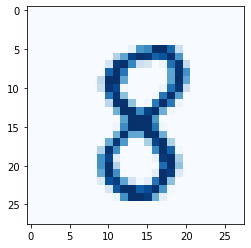

In [3]:
plt.imshow(x_train[25081,:,:,0]/255)

### Turn targets into one-hot vectors:

In [4]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[25081]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

### Define the Convolutional network No. 1

In [5]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = keras.models.Sequential()
model.add(Conv2D(20, input_shape=(img_width, img_height, 1), kernel_size=(5,5),
                 strides=(1,1), activation='relu', padding='same',
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=100, activation='relu',
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

num_classes = 10
model.add(Dense(units=num_classes, activation='softmax',
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

# model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.01, momentum=0.9),
#               run_eagerly=True,
              metrics=['accuracy'])

trained_model= model.fit(x_train, y_train,
              batch_size=8192,
              epochs=60, verbose=1,
              validation_data=(x_test, y_test),
              shuffle=True, validation_freq=30,
              callbacks = [early_stopping])

Epoch 1/60
8/8 [==============================] - 20s 3s/step - loss: 3.0639 - accuracy: 0.3907
Epoch 2/60
8/8 [==============================] - 18s 2s/step - loss: 1.8381 - accuracy: 0.3737
Epoch 3/60
8/8 [==============================] - 18s 2s/step - loss: 0.9508 - accuracy: 0.7503
Epoch 4/60
3/8 [==========>...................] - ETA: 9s - loss: 0.4308 - accuracy: 0.8822


KeyboardInterrupt



In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)

In [ ]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['training_loss', 'validation_loss'])

### Define the convolutional network No. 2

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

model2 = keras.models.Sequential()
model2.add(Conv2D(20, input_shape=(img_width, img_height, 1),
                 kernel_size=(3,3), strides=(1,1), padding='same',
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation(activations.relu))
model2.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=(2,2)))
model2.add(Conv2D(30,
                 kernel_size=(3,3), strides=(1,1), padding='same',
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation(activations.relu))
model2.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=(2,2)))
model2.add(Conv2D(50,
                 kernel_size=(3,3), strides=(1,1), padding='same',
                 kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation(activations.relu))

model2.add(Flatten())
num_classes = 10
model2.add(Dense(units=num_classes, activation='softmax',
                kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01)))

# model.summary()
model2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.01, momentum=0.9),
#               run_eagerly=True,
              metrics=['accuracy'])

trained_model2= model2.fit(x_train, y_train,
              batch_size=8192,
              epochs=30, verbose=1,
              validation_data=(x_test, y_test),
              shuffle=True, validation_freq=30,
              callbacks = [early_stopping])

In [ ]:
score = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
plt.plot(trained_model2.history['loss'])
plt.plot(trained_model2.history['val_loss'])
plt.legend(['training_loss', 'validation_loss'])